# CSE 7337 Information Retrieval and Web Search Project 2


                                                                               Name: Zheng Li
                                                                               Email: zli1@smu.edu
                                                                               Civil and Environmental Engineering

   ## 1. Project overview

        This project aims to build a search engine based upon the crawler built in Project 1 with various capabilities: 
        1) clustering the docuements retrieved from cralwer
        2) perform simple query 
        3) perform title-weighted query
        4) perform query expansion
        The search engine is constructed using all text-based documents including text, html and php files. <Title> tag and URL of each document will be presented during the search as well. 

## 2. Engine Structure

    The structure of the engine search is presented as follows:
        1) Documents are represented in vector space with weighting scheme: ntc
        2) K-means clustering was performed to find 5 leaders/its followers
        3) Title weight is set to be 0.25 if any of query words appears in the <title> tag
        4) A small thesurus was used for query expansion if too few query (K/2) search results were returned. 

## 3. Source Code

    The source code for this crawler is written in Jupyter Notebook with Python 3 kernel. Please see the source code and its implementation in the following section.

In [1]:
## This notebook is used as the submission for project 2 Search engine: CSE 7337 Information Retrieval and Web Search
## Author: Zheng Li
## Ph.D candidate
## Civil and Environmental Engineering
## Southern Methodist University

In [1]:
# Settings for notebook
try:
    import pandas as pd
except:
    !pip install pandas
    import pandas as pd
import sys
import numpy as np

##    Reading in crawled documents

In [620]:
df = pd.read_json('crawl_result.json')
df = df[['URL','URL_format','Status','Title','Text','Images','SubLinks','ShouldNotRetrieve']]
print(df.shape)
df.head()

(46, 8)


,URL,URL_format,Status,Title,Text,Images,SubLinks,ShouldNotRetrieve
0,https://s2.smu.edu/~fmoore/,NaN,200,[Freeman Moore - SMU Spring 2018],spring freeman moore phd email fmoore smu ed s...,[https://s2.smu.edu/~fmoore/SMU-CSE-LOGO-COLOR...,"[http://lyle.smu.edu, http://lyle.smu.edu/~fmo...",[http://lyle.smu.edu]
1,https://s2.smu.edu/~fmoore/schedule.htm,htm,200,[SMU CSE 5337/7337 Spring 2018 Schedule],smu cse preliminary schedule page maintained l...,[https://s2.smu.edu/~fmoore/misc/permuterminde...,"[https://s2.smu.edu/~fmoore/index.htm, https:/...","[http://www.gedpage.com/soundex.html, http://w..."
2,https://s2.smu.edu/~fmoore/misc/levenshtein.html,html,200,[Levenshtein Distance demo],levenshtein distance calculator example fast c...,[],[],[]
3,https://s2.smu.edu/~fmoore/misc/porter_stemmer...,html,200,[Porter Stemmer Online],javascript porter stemmer online find porter s...,[],"[http://tartarus.org/~martin/PorterStemmer/, h...","[http://tartarus.org/~martin/PorterStemmer/, h..."
4,https://s2.smu.edu/~fmoore/index-fall2017.htm,htm,200,[Freeman Moore - SMU Fall 2017],fall freeman moore phd email fmoore lyle smu e...,[https://s2.smu.edu/~fmoore/SMU-CSE-LOGO-COLOR...,"[http://lyle.smu.edu, http://lyle.smu.edu/~fmo...","[http://lyle.smu.edu, http://oracle.com.edgesu..."


## Organizing search results for search engine

In [621]:
df = df.loc[((df.URL_format=='php')|
            (df.URL_format=='txt')|
            (df.URL_format=='html'))&
            (df.Status==200),['URL','URL_format','Status','Title','Text']]
print(df.shape)
df.to_pickle('ces7337_project2_data.pickle')
df

(38, 5)


,URL,URL_format,Status,Title,Text
2,https://s2.smu.edu/~fmoore/misc/levenshtein.html,html,200,[Levenshtein Distance demo],levenshtein distance calculator example fast c...
3,https://s2.smu.edu/~fmoore/misc/porter_stemmer...,html,200,[Porter Stemmer Online],javascript porter stemmer online find porter s...
10,https://s2.smu.edu/~fmoore/misc/exam1.html,html,200,[CSE 7337 Spring 2018 distance students exam 1...,cse distance student exam location inclass vs ...
11,https://s2.smu.edu/~fmoore/misc/useragent.php,php,200,[CSE 5337/7337 User-Agent],html user agent information received crawler d...
12,https://s2.smu.edu/~fmoore/textfiles/mary4.txt,txt,200,[],lamb friendly
13,https://s2.smu.edu/~fmoore/textfiles/mary3.txt,txt,200,[],mary lamb named mary
14,https://s2.smu.edu/~fmoore/textfiles/mary2.txt,txt,200,[],marys lambs little
15,https://s2.smu.edu/~fmoore/textfiles/mary1.txt,txt,200,[],mary little lamb
16,https://s2.smu.edu/~fmoore/textfiles/index.html,html,200,[SMU CSE 5/7337 Spring 2018 Textfiles],textfiles clustering golf golf golf golf golf ...
17,https://s2.smu.edu/~fmoore/misc/text/index.php,php,200,"[SMU CSE 5/7337 Spring 2018 text files""]",additional text files support query implementa...


## Text cleanning

In [280]:
from textblob import Word
from nltk import pos_tag
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
def lemmatization(list_words):
    lemmatized_words = []
    #lemma does not accept pos tags natively - convert to simplified version
    posTb2Wn={'JJ':'a', 'JJR':'a', 'JJS':'a', 'RB':'r', 'RBR':'r', 'RBS':'r', 'VB':'v', 'VBD':'v', 
              'VBG':'v', 'VBN':'v', 'VBP':'v', 'VBZ':'v', 'NN':'n', 'NNS':'n', 'NNP':'n', 'NNPS':'n', 
              'n':'n', 'a':'a', 'r':'r', 'v':'v', 's':'s'}
    for item in list_words:
        item = item.split()
        if len(item)>1:
            lemmatized_phrase =[]
            for word,tag in pos_tag(item):
                lemmatized_phrase.append(Word(word).lemmatize(posTb2Wn.get(tag)))
            lemmatized_words.append(' '.join(lemmatized_phrase))
        else:
            word,tag = pos_tag(item)[0]
            lemmatized_words.append(Word(word).lemmatize(posTb2Wn.get(tag)))
            
    return lemmatized_words
df_txt = df.loc[:,['Text']]
df_txt.rename(columns={"Text": "raw_text"},inplace=True)
# df_txt['title'] = df.loc[:,['Title']]
## text
tknz = TweetTokenizer()
df_tokenize = df_txt.applymap(lambda x: tknz.tokenize(x))
df_lemma = df_tokenize.applymap(lambda x: lemmatization(x))
df_txt['text']=df_lemma.loc[:,'raw_text'].apply(lambda x: ' '.join(x))
df_txt['title'] = df['Title'].apply(lambda x: x[0] if len(x)>0 else '')
df_txt['url'] = df.loc[:,['URL']]
new_idx = list(range(0,df_txt.shape[0]))
df_txt['idx'] = new_idx
df_txt.set_index('idx',inplace=True)

#### Assign new index for each document

In [281]:
df_txt

,raw_text,text,title,url
idx,,,,
0,levenshtein distance calculator example fast c...,levenshtein distance calculator example fast c...,Levenshtein Distance demo,https://s2.smu.edu/~fmoore/misc/levenshtein.html
1,javascript porter stemmer online find porter s...,javascript porter stemmer online find porter s...,Porter Stemmer Online,https://s2.smu.edu/~fmoore/misc/porter_stemmer...
2,cse distance student exam location inclass vs ...,cse distance student exam location inclass v p...,CSE 7337 Spring 2018 distance students exam 1 ...,https://s2.smu.edu/~fmoore/misc/exam1.html
3,html user agent information received crawler d...,html user agent information receive crawler de...,CSE 5337/7337 User-Agent,https://s2.smu.edu/~fmoore/misc/useragent.php
4,lamb friendly,lamb friendly,,https://s2.smu.edu/~fmoore/textfiles/mary4.txt
5,mary lamb named mary,mary lamb name mary,,https://s2.smu.edu/~fmoore/textfiles/mary3.txt
6,marys lambs little,mary lamb little,,https://s2.smu.edu/~fmoore/textfiles/mary2.txt
7,mary little lamb,mary little lamb,,https://s2.smu.edu/~fmoore/textfiles/mary1.txt
8,textfiles clustering golf golf golf golf golf ...,textfiles cluster golf golf golf golf golf bas...,SMU CSE 5/7337 Spring 2018 Textfiles,https://s2.smu.edu/~fmoore/textfiles/index.html


## Search Engine code

    In total 38 documents were retrieved by crawler and will be used for the following analysis. Features of each document need to be constructed before implement K-means algorithms. vector space model (tf-idf) is used as the feature for each document to perform K-means clustering

In [650]:
df_txt.shape[0]

38

In [797]:
class cse7337SearchEngine(object):
    def __init__(self,
                 n_documents = 0,
                 n_leaders = 0,
                 documents ='blank text',
                 leader_idx = [],
                 follower_idx = [],
                 query = None,
                 vectorizer = None,
                 title_vectorizer = None,
                 vector_space = None,
                 title_vector = None,
                 vector_dataframe = None,
                 vocabulary = None,
                 cluster_model=None,
                 enable_title_weighting = False):
        self.n_documents = n_documents
        self.n_leaders = n_leaders
        self.documents = documents # columns : [title],[text],[url]
        self.query = query
        self.leader_idx = leader_idx
        self.follower_idx = follower_idx
        self.vectorizer = vectorizer
        self.title_vectorizer = title_vectorizer
        self.title_vector = title_vector
        self.vector_space = vector_space
        self.vector_dataframe = vector_dataframe
        self.vocabulary = vocabulary
        self.cluster_model = cluster_model
        self.enable_title_weighting =enable_title_weighting
        self.query_expanded = False
    @staticmethod
    def find_index(input_list,item):
        return [i for i, j in enumerate(input_list) if j == item]
        
    def feed_documents(self,df_documents,scheme = 'ntc'):
        from sklearn.feature_extraction.text import TfidfVectorizer
        self.documents = df_documents
        self.n_documents= df_documents.shape[0]
        print('Feed in {0} documents!'.format(self.n_documents))
        # Construct vector space
        # clean title text
        df_txt= self.documents.loc[:,['title']]
        df_lower = df_txt.applymap(lambda x: x.lower())
        df_tokenize = df_lower.applymap(lambda x: tknz.tokenize(x))
        df_lemma = df_tokenize.applymap(lambda x: lemmatization(x))
        self.documents['clean_title']=df_lemma.loc[:,'title'].apply(lambda x: ' '.join(x)) 
        # combine title+text content
        all_text = self.documents[['clean_title','text']].apply(lambda x: ' '.join(x), axis=1)
        
        title_text = self.documents['clean_title'].values.tolist()
        summary_text = all_text.values.tolist()
        vectorizer = TfidfVectorizer(max_df=1.0, max_features=1000,
                                 min_df=0.0, stop_words='english',
                                 use_idf=True, norm='l2',
                                 smooth_idf = False)
        title_vectorizer = TfidfVectorizer(max_df=1.0, max_features=1000,
                                 min_df=0.0, stop_words= None,
                                 use_idf=False, norm=None,
                                 smooth_idf = False)
        X = vectorizer.fit_transform(summary_text)
        X2 = title_vectorizer.fit_transform(title_text)
        self.vectorizer = vectorizer
        self.title_vectorizer =title_vectorizer
        self.vocabulary = list(vectorizer.vocabulary_.keys())
        self.vector_space = X
        self.title_vector = X2
        docs=['doc'+str(i+1) for i in range(0,X.shape[0])]
        self.vector_dataframe = pd.DataFrame(data=X.toarray(),index=docs,
                   columns=vectorizer.get_feature_names())
        print('Vector space constructed with scheme: #{0}#'.format(scheme))
        return self.vector_dataframe
    def construct_leaders(self,n_leaders=0,method='Kmeans'):
        from sklearn.cluster import KMeans
        self.n_leaders = n_leaders
        if method =='Kmeans':
            # perform K-means 
            print('Running Kmeans...')
            km = KMeans(n_clusters=n_leaders, init='k-means++', max_iter=1000, n_init=100,
                verbose=0)
            km.fit(X)
            centroids = km.cluster_centers_
            leader_idx = []
            follower_idx =[]
            for i in range(0,n_leaders):
                centroid = km.cluster_centers_[i]
                dist_centroid = np.sqrt(np.sum(np.square(X - centroid),axis=1))
                leader_idx.append(np.argmin(dist_centroid))
                follower_idx.append(self.find_index(km.labels_,i))
            self.leader_idx = leader_idx
            self.follower_idx = follower_idx
            # clustering score is the squared distances of the sample to their closest cluster center.
            clusterings_score =[]
            for i in range(0,self.n_documents):
                clusterings_score.append(-km.score(X[i,:]))
            self.clustering_score = clusterings_score 
            print('Leaders located!')
    def show_leaders(self):
        
        for i in range(0,self.n_leaders):
            idx = self.leader_idx[i]
            follower_idx = self.follower_idx[i]
            follower_str = '\n\t\t'
            for j in follower_idx:
                if j!=idx:
                    follower_str = ''.join([follower_str,
                                            'score: ',
                                            '{0:.3f}'.format(self.clustering_score[j]),
                                            ' => URL: ',
                                            self.documents.loc[j,'url'],'\n\t\t']) 
            print('\tLeader {0}: Title:{1}\n\tScore: {2:.3f} => URL: {3}\n\tFollowers:{4}'.
                  format(i,
                         self.documents.loc[idx,'title'],
                         self.clustering_score[idx],
                         self.documents.loc[idx,'url'],
                         follower_str))
    def search_query(self,query,K):
        if query !='stop':
            from textblob import TextBlob
            self.query = query
            query_vector = self.vectorizer.transform([query]).toarray()
            score_array = np.zeros([1,self.n_documents])[0] # initialize score array
            if self.enable_title_weighting:
                query_title_vector = self.title_vectorizer.transform([query]).toarray()
                title_score = np.transpose(self.title_vector@np.transpose(query_title_vector))[0]
                title_nzero_indices = np.nonzero(title_score)
                score_array[title_nzero_indices] = 0.25
    #         if query_vector.any():
            # compute similarity score
            score_array += np.transpose(self.vector_space@np.transpose(query_vector))[0]
            score_nzero = score_array[score_array>0]
            print(100*'=')
            print("Search Results ==> [{0}]".format(query))
            if len(score_nzero)<K/2:
                if self.query_expanded:
                    if len(score_nzero)>0:
                        self.print_query_result(K,score_array,score_nzero)
                    else:
                        print('\n\t\t '+30*'-')
                        print('\t\t |No relevant documents found {0} !|'.format(len(score_nzero)))
                        print('\t\t '+30*'-')  
                        self.query_expanded = False
                else:
                    print(10*'*'+'|| Less than half of K({0}) returned({1}), perform thesaurus expansion instead ||'.format(K,len(score_nzero))+10*'*')
                    self.query_expansion()
                    self.search_query(self.query,K)
            else:
                self.print_query_result(K,score_array,score_nzero)
        else:
            print('****Engine STOP****')      
#         else:
#             print('Query words are not in the dictionary')
    def print_query_result(self,K,score_array,score_nzero):
        print(self.vector_space.shape)
        K = min([K,len(score_nzero)])
        top_K_document_idx = np.argsort(-score_array)[:K]
        for (i,idx) in enumerate(top_K_document_idx):
            blob = TextBlob(self.documents.loc[idx,'text'])
            if len(blob.words)>=20:
                preview = ' '.join(blob.words[:20])
            else:
                preview = ' '.join(blob.words)
            # adjust preview to look better
            if len(preview)>80:
                preview = '\n\t\t'+preview[:80]+'\n\t\t'+preview[80:]
            else:
                preview = '\n\t\t'+preview
            print('\t Title: {0}\n{1}\t Score: {2:.4f}\n\t URL: {3}\n\t Preview: {4}\n'.format(
                self.documents.loc[idx,'title'],
                i+1,
                score_array[idx],
                self.documents.loc[idx,'url'],
                preview))
            self.query_expanded = False
        
    def query_expansion(self):
        blob = TextBlob(self.query)
        thesaurus = self.get_thesaurus()
        added_terms = ['']
        for word in blob.words:
            if word in thesaurus.keys():
                added_terms+=thesaurus[word]
        self.query = ' '.join([self.query,' '.join(added_terms)])
        print('Expanded query: [{0}]'.format(self.query))
        self.query_expanded = True
    def get_thesaurus(self):
        return {'beautiful':['nice','fancy'],
                'chapter':['chpt'],
                'chpt':['chapter'],
                'responsible':['owner','accountable'],
                'freemanmoore':['freeman','moore'],
                'dept':['department'],
                'brown':['beige','tan','auburn'],
                'tues':['Tuesday'],
                'sole':['owner','single','shoe','boot'],
                'homework':['hmwk','home','work'],
                'novel':['book','unique'],
                'computer':['cse'],
                'story': ['novel','book'],
                'hocuspocus':['magic','abracadabra'],
                'thisworks':['this','work']}

###    Clustering

    K-means clustering algorithm was performed in this search engine, the leaders were found by:
        1) Form 5 clusters using K-means algorithm
        2) Find 5 centroids from the clusters
        3) For each centroid, the document that is closest to the centroid is assigned as the leader of that cluster.
        4) The leader/follower url and scores were presented as well. 

In [798]:
engine = cse7337SearchEngine(enable_title_weighting=True)
vector_dataframe=engine.feed_documents(df_txt)
engine.construct_leaders(n_leaders =5,method='Kmeans')
engine.show_leaders()

Feed in 38 documents!
Vector space constructed with scheme: #ntc#
Running Kmeans...
Leaders located!
	Leader 0: Title:
	Score: 0.748 => URL: https://s2.smu.edu/~fmoore/textfiles/football4.txt
	Followers:
		score: 0.972 => URL: https://s2.smu.edu/~fmoore/misc/levenshtein.html
		score: 0.965 => URL: https://s2.smu.edu/~fmoore/misc/porter_stemmer_example.html
		score: 0.902 => URL: https://s2.smu.edu/~fmoore/textfiles/baseball2.txt
		score: 0.899 => URL: https://s2.smu.edu/~fmoore/textfiles/baseball1.txt
		score: 0.889 => URL: https://s2.smu.edu/~fmoore/textfiles/basketball5.txt
		score: 0.892 => URL: https://s2.smu.edu/~fmoore/textfiles/basketball1.txt
		score: 0.953 => URL: https://s2.smu.edu/~fmoore/textfiles/golf3.txt
		score: 0.838 => URL: https://s2.smu.edu/~fmoore/textfiles/football5.txt
		score: 0.778 => URL: https://s2.smu.edu/~fmoore/textfiles/football3.txt
		score: 0.850 => URL: https://s2.smu.edu/~fmoore/textfiles/football2.txt
		score: 0.976 => URL: https://s2.smu.edu/~fmoore

    According to the clustering result, K-means is able to pick up some clusters (e.g all the “mary”, "building" files are clustered correctly), but cluster 1 seems to contains a lots of documents that are not supposed to be grouped (docuemnt "exam1.html" and "golf1.txt"). In conclusion, Setting clusters equals 5 works just fine with some degree of bias.
    In addition, 5 clusters may not be the optimal number of clusters if we investigate the betweeen/within cluster separabilities. Suggested by both Elbow curve (turning point) and sihoutte curve (peak point), the documents does not expressive enough to exhibit clear pattern of clustering.

#### Engine search testing

In [802]:
# search for given query
engine.search_query('little lamb',K=6)

Search Results ==> [little lamb]
(38, 978)
	 Title: 
1	 Score: 0.8222
	 URL: https://s2.smu.edu/~fmoore/textfiles/mary2.txt
	 Preview: 
		mary lamb little

	 Title: 
2	 Score: 0.8222
	 URL: https://s2.smu.edu/~fmoore/textfiles/mary1.txt
	 Preview: 
		mary little lamb

	 Title: 
3	 Score: 0.3651
	 URL: https://s2.smu.edu/~fmoore/textfiles/mary4.txt
	 Preview: 
		lamb friendly

	 Title: 
4	 Score: 0.2655
	 URL: https://s2.smu.edu/~fmoore/textfiles/mary3.txt
	 Preview: 
		mary lamb name mary



In [789]:
engine.search_query('basketball',K=6)

Search Results ==> [basketball]
(38, 978)
	 Title: SMU CSE 5/7337 Spring 2018 Textfiles
1	 Score: 0.4524
	 URL: https://s2.smu.edu/~fmoore/textfiles/index.html
	 Preview: 
		textfiles cluster golf golf golf golf golf basketball basketball basketball bask
		etball basketball baseball baseball baseball baseball baseball football football football

	 Title: 
2	 Score: 0.3831
	 URL: https://s2.smu.edu/~fmoore/textfiles/basketball3.txt
	 Preview: 
		after win season mavs coach careful promise much next season basketball team fan
		 deserve well say mavs president donnie nelson

	 Title: 
3	 Score: 0.2053
	 URL: https://s2.smu.edu/~fmoore/textfiles/basketball4.txt
	 Preview: 
		the golden state warrior basketball team something prove right plan stay playoff
		 year thompson found shoot touch score point make

	 Title: 
4	 Score: 0.1987
	 URL: https://s2.smu.edu/~fmoore/textfiles/basketball2.txt
	 Preview: 
		uta fire good man look ark covenant without indiana jones a ̂ € ” need coach win
		 

In [795]:
engine.search_query('mary',K=6)

Search Results ==> [mary]
(38, 978)
	 Title: 
1	 Score: 0.9087
	 URL: https://s2.smu.edu/~fmoore/textfiles/mary3.txt
	 Preview: 
		mary lamb name mary

	 Title: 
2	 Score: 0.5692
	 URL: https://s2.smu.edu/~fmoore/textfiles/mary2.txt
	 Preview: 
		mary lamb little

	 Title: 
3	 Score: 0.5692
	 URL: https://s2.smu.edu/~fmoore/textfiles/mary1.txt
	 Preview: 
		mary little lamb



In [799]:
engine.search_query('stop',K=6)

****Engine STOP****


In [791]:
engine.search_query('moore smu',K=6)

Search Results ==> [moore smu]
**********|| Less than half of K(6) returned(2), perform thesaurus expansion instead ||**********
Expanded query: [moore smu ]
Search Results ==> [moore smu ]
(38, 978)
	 Title: SMU CSE 5/7337 Spring 2018 text files"
1	 Score: 0.3812
	 URL: https://s2.smu.edu/~fmoore/misc/text/index.php
	 Preview: 
		additional text file support query implementation part part part part part hocus
		pocus word file test exact match word building 1

	 Title: SMU CSE 5/7337 Spring 2018 Textfiles
2	 Score: 0.3679
	 URL: https://s2.smu.edu/~fmoore/textfiles/index.html
	 Preview: 
		textfiles cluster golf golf golf golf golf basketball basketball basketball bask
		etball basketball baseball baseball baseball baseball baseball football football football



In [792]:
engine.search_query('Bob Ewell where Scout',K=6)

Search Results ==> [Bob Ewell where Scout]
(38, 978)
	 Title: Mockingbird part 5
1	 Score: 0.3769
	 URL: https://s2.smu.edu/~fmoore/misc/text/mockingbird5.html
	 Preview: 
		mockingbird part atticus want jem scout present tom robinson trial seat availabl
		e main floor invitation rev sykes jem scout dill

	 Title: Mockingbird part 4
2	 Score: 0.1514
	 URL: https://s2.smu.edu/~fmoore/misc/text/mockingbird4.html
	 Preview: 
		mockingbird part story take place three year great depression fictional tire old
		 town maycomb alabama seat maycomb county focus six

	 Title: Mockingbird part 3
3	 Score: 0.1249
	 URL: https://s2.smu.edu/~fmoore/misc/text/mockingbird3.html
	 Preview: 
		mockingbird part suddenly scout jem tolerate barrage racial slur insult atticus 
		role trial time scout difficult time restrain physically fight

	 Title: Mockingbird part 2
4	 Score: 0.0941
	 URL: https://s2.smu.edu/~fmoore/misc/text/mockingbird2.html
	 Preview: 
		mockingbird part neighbor puzzle mysterious art

In [793]:
engine.search_query('three year story',K=6)

Search Results ==> [three year story]
(38, 978)
	 Title: Mockingbird part 4
1	 Score: 0.1109
	 URL: https://s2.smu.edu/~fmoore/misc/text/mockingbird4.html
	 Preview: 
		mockingbird part story take place three year great depression fictional tire old
		 town maycomb alabama seat maycomb county focus six

	 Title: Mockingbird novel part 1
2	 Score: 0.1097
	 URL: https://s2.smu.edu/~fmoore/misc/text/mockingbird1.html
	 Preview: 
		mockingbird part kill mockingbird primarily novel grow extraordinary circumstanc
		e southern united state story cover span three year main character undergo

	 Title: Mockingbird part 2
3	 Score: 0.0677
	 URL: https://s2.smu.edu/~fmoore/misc/text/mockingbird2.html
	 Preview: 
		mockingbird part neighbor puzzle mysterious arthur radley nickname boo never com
		e outside dill another neighbor nephew start spending summer maycomb

	 Title: 
4	 Score: 0.0595
	 URL: https://s2.smu.edu/~fmoore/textfiles/golf2.txt
	 Preview: 
		jay haas nearly shot age friday take lea

In [794]:
engine.search_query('Atticus to defend Maycomb',K=6)

Search Results ==> [Atticus to defend Maycomb]
(38, 978)
	 Title: Mockingbird part 4
1	 Score: 0.3681
	 URL: https://s2.smu.edu/~fmoore/misc/text/mockingbird4.html
	 Preview: 
		mockingbird part story take place three year great depression fictional tire old
		 town maycomb alabama seat maycomb county focus six

	 Title: Mockingbird novel part 1
2	 Score: 0.2655
	 URL: https://s2.smu.edu/~fmoore/misc/text/mockingbird1.html
	 Preview: 
		mockingbird part kill mockingbird primarily novel grow extraordinary circumstanc
		e southern united state story cover span three year main character undergo

	 Title: Mockingbird part 5
3	 Score: 0.1880
	 URL: https://s2.smu.edu/~fmoore/misc/text/mockingbird5.html
	 Preview: 
		mockingbird part atticus want jem scout present tom robinson trial seat availabl
		e main floor invitation rev sykes jem scout dill

	 Title: Mockingbird part 2
4	 Score: 0.0546
	 URL: https://s2.smu.edu/~fmoore/misc/text/mockingbird2.html
	 Preview: 
		mockingbird part neighbor

In [804]:
engine.search_query('a the and',K=6)

Search Results ==> [a the and]
**********|| Less than half of K(6) returned(1), perform thesaurus expansion instead ||**********
Expanded query: [a the and ]
Search Results ==> [a the and ]
(38, 978)
	 Title: This is the magic file
1	 Score: 0.2500
	 URL: https://s2.smu.edu/~fmoore/misc/text/magictext.html
	 Preview: 
		magic show title brown beige tan auburn



### Dicussion on query search

    1) If user enters a word that is not in the dictionary, the search will not return any relevant(similar) result. (cosine similarity equals zero)
    2) If a user enters a stop word, the search engine will not return any relevant result since the implementation of this search engine has the stop words removal embeded. 
    3) The search engine is able to return correct results simply by testing using query that:
        i)contains all text from a document
        ii) does not contain any words from a document
    The scores for both extreme senarios are 1 and 0, indicating the correct internal similarity calculation. 

Clustering sparse data with 2 clusters
Clustering sparse data with 3 clusters
Clustering sparse data with 4 clusters
Clustering sparse data with 5 clusters
Clustering sparse data with 6 clusters
Clustering sparse data with 7 clusters
Clustering sparse data with 8 clusters
Clustering sparse data with 9 clusters
Clustering sparse data with 10 clusters


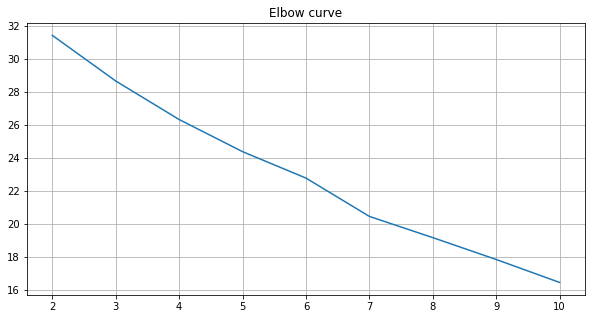

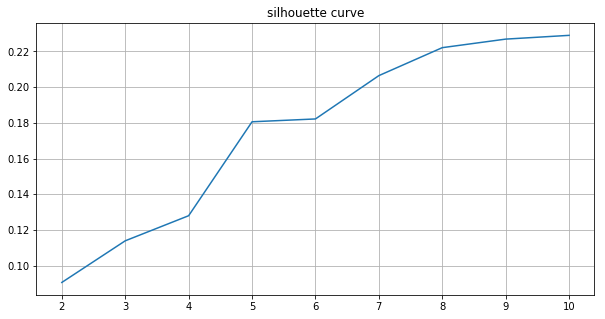

In [596]:
from matplotlib import pyplot as plt
% matplotlib inline
distortion = []
silhouette = []
K = range(2,11)
for k in K:
    km = KMeans(n_clusters=k, init='k-means++', max_iter=1000, n_init=100,
                verbose=0)
    print("Clustering sparse data with %d clusters" % k)
    t0 = time()
    km.fit(X)
    distortion.append(km.inertia_)
    silhouette.append(metrics.silhouette_score(X, km.labels_))
fig = plt.figure(figsize=(10, 5))
plt.plot(K, distortion)
plt.grid(True)
plt.title('Elbow curve')
fig = plt.figure(figsize=(10, 5))
plt.plot(K, silhouette)
plt.grid(True)
plt.title('silhouette curve')

In [800]:
# all_text = df_txt[['clean_title','text']].apply(lambda x: ' '.join(x), axis=1)     
# # title_text = df_txt['clean_title'].values.tolist()
# summary_text = all_text.values.tolist()
# summary_text[25:27]
# vectorizer = TfidfVectorizer(max_df=1.0, max_features=2000,
#                                  min_df=0.0, stop_words='english',
#                                  use_idf=True, norm='l2',
#                                  smooth_idf = False)
# X = vectorizer.fit_transform(summary_text)
# a=vectorizer.transform(['buildingone buildingtwo'])
# print(len(vectorizer.vocabulary_))
# vectorizer.vocabulary_

In [812]:
a.shape

(12, 2)

In [809]:
a = np.array([[19,19],[20,18],[21,22],[23,20],[28,30],[30,31],[31,28],[32,33],[34,34],[40,41],[45,44],[46,42]])
a

array([[19, 19],
       [20, 18],
       [21, 22],
       [23, 20],
       [28, 30],
       [30, 31],
       [31, 28],
       [32, 33],
       [34, 34],
       [40, 41],
       [45, 44],
       [46, 42]])

Clustering sparse data with 2 clusters
Clustering sparse data with 3 clusters
Clustering sparse data with 4 clusters


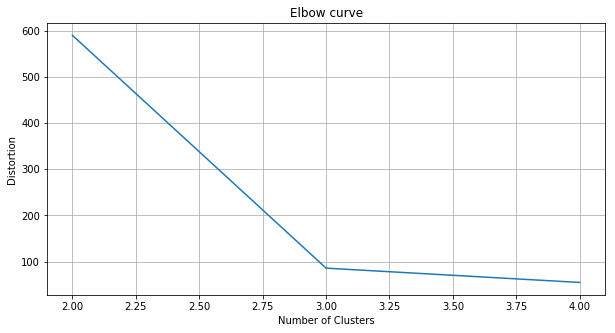

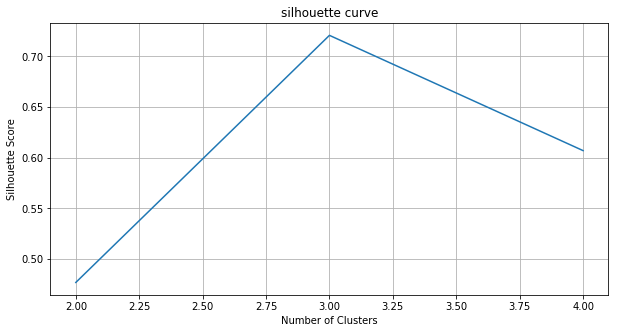

In [819]:
X=a
distortion = []
silhouette = []
K = range(2,5)
for k in K:
    km = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=10,
                verbose=0)
    print("Clustering sparse data with %d clusters" % k)
    t0 = time()
    km.fit(X)
    distortion.append(km.inertia_)
    silhouette.append(metrics.silhouette_score(X, km.labels_))
fig = plt.figure(figsize=(10, 5))
plt.plot(K, distortion)
plt.grid(True)
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.title('Elbow curve')
plt.savefig('final_1.png')
fig = plt.figure(figsize=(10, 5))
plt.plot(K, silhouette)
plt.grid(True)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('silhouette curve')
plt.savefig('final_2.png')